In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import domain_adapt.domain_adapt.new.data as data
import python_utils.python_utils.basic as basic
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#
#alpha = 0.5
alpha = 0.2
xs_train, xs_test, ys_train, ys_test = data.v_data(num_train=200, num_test=100, useful_dim=1, same_dim=1, diff_dim=10, alpha=alpha)
print xs_train.shape, xs_test.shape, ys_train.shape, ys_test.shape

(200, 13) (100, 13) (200,) (100,)


In [4]:
import domain_adapt.domain_adapt.new.fxns as fxns
fxns.SIR_directions(xs_train, ys_train)

Couldn't import dot_parser, loading of dot files will not be possible.


/Users/fultonw/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: MASS

  warnings.warn(x, RRuntimeWarning)


array([[ 0.18020981, -0.02067832, -0.39310566, -0.3014737 ,  0.36947381,
        -0.24633193, -0.04809214,  0.51831492, -0.29528382, -0.22392211,
         0.00879456,  0.12287623, -0.21239245],
       [-0.41301137, -0.06777083, -0.02155992, -0.38645874,  0.13117488,
        -0.37908636, -0.82516235, -0.017626  ,  0.03761441, -0.00830458,
        -0.25279914,  0.09009458,  0.01457066],
       [ 0.42559875, -0.14525035, -0.55902168, -0.15469643, -0.01148204,
         0.06199798, -0.07164441, -0.49854018,  0.10223092,  0.58384345,
         0.24522058,  0.01994474,  0.01370394],
       [-0.34484676,  0.17096888, -0.24001612,  0.05387488, -0.21451103,
         0.15676303, -0.08425271, -0.00642141, -0.09249861, -0.09604605,
        -0.02911843, -0.40134095, -0.61407019],
       [-0.21170483, -0.55972461,  0.08274919,  0.23124394, -0.33375667,
        -0.0939035 ,  0.07705877,  0.03111505, -0.17179318,  0.14754483,
        -0.01693589,  0.633185  , -0.42454519],
       [ 0.06223424, -0.015702

In [5]:
#

def loss(ys, ys_hat):
    error = ys - ys_hat
    return np.mean(error * error)

def cv_error(fitter, num_folds, xs, ys):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=num_folds)
    losses = []
    for (train_idx, test_idx) in kf.split(xs):
        xs_train = xs[train_idx]
        ys_train = ys[train_idx]
        xs_test = xs[test_idx]
        ys_test = ys[test_idx]
        predictor = fitter.fit(xs_train, ys_train)
        ys_test_hat = predictor.predict(xs_test)
        losses.append(loss(ys_test, ys_test_hat))
    return np.mean(losses)

from sklearn.linear_model import RidgeCV
fitter = RidgeCV()
num_folds = 5
print 'dim %d' % 0, cv_error(fitter, num_folds, xs_test[:,0:1], ys_test)
print 'dim %d' % 1, cv_error(fitter, num_folds, xs_test[:,1:2], ys_test)
print 'dim %d,%d' % (0,1), cv_error(fitter, num_folds, xs_test[:,0:2], ys_test)

dim 0 0.0922600362207
dim 1 0.00400805313895
dim 0,1 0.000139650920736


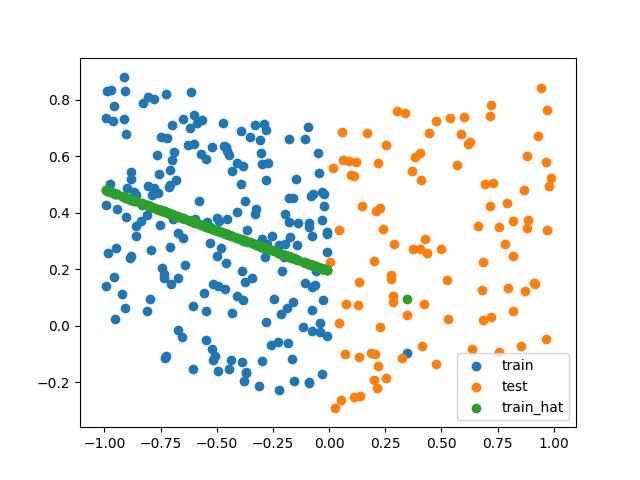

squared error 14.5946292023


In [6]:
# plot against useful dim 0
fig, ax = plt.subplots()
this_xs_train = xs_train[:,0:1]
this_xs_test = xs_test[:,0:1]
ax.scatter(this_xs_train, ys_train, label='train')
ax.scatter(this_xs_test, ys_test, label='test')
ax.legend()
from sklearn.linear_model import Ridge
ys_train_hat = Ridge(alpha=0.001).fit(this_xs_train,ys_train).predict(this_xs_train)
ax.scatter(this_xs_train, ys_train_hat, label='train_hat')
ax.legend()
basic.display_fig_inline(fig)
print 'squared error', (np.linalg.norm(ys_train_hat - ys_train)**2).mean()

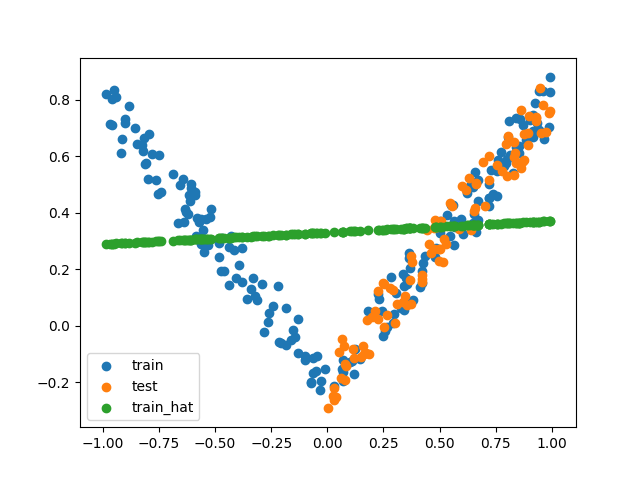

squared error 15.9312439685


In [7]:
# plot against useful dim 1
fig, ax = plt.subplots()
this_xs_train = xs_train[:,1:2]
this_xs_test = xs_test[:,1:2]
ax.scatter(this_xs_train, ys_train, label='train')
ax.scatter(this_xs_test, ys_test, label='test')
ax.legend()
from sklearn.linear_model import Ridge
ys_train_hat = Ridge(alpha=0.001).fit(this_xs_train,ys_train).predict(this_xs_train)
ax.scatter(this_xs_train, ys_train_hat, label='train_hat')
ax.legend()
basic.display_fig_inline(fig)
print 'squared error', (np.linalg.norm(ys_train_hat - ys_train)**2).mean()

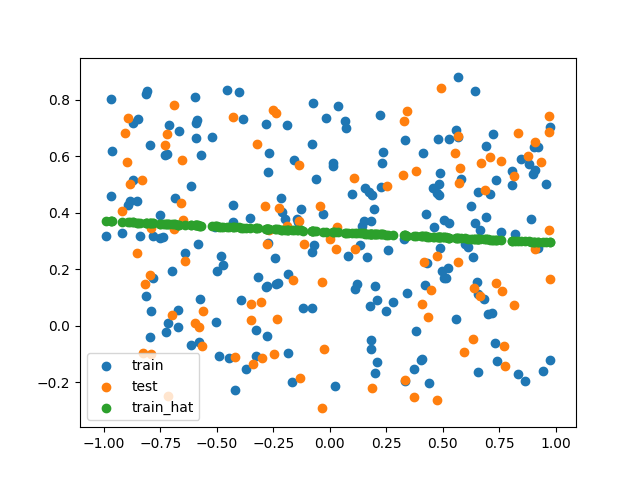

squared error 15.9597815676


In [8]:
# plot against useful dim1
fig, ax = plt.subplots()
this_xs_train = xs_train[:,2:3]
this_xs_test = xs_test[:,2:3]
ax.scatter(this_xs_train, ys_train, label='train')
ax.scatter(this_xs_test, ys_test, label='test')
ax.legend()
from sklearn.linear_model import Ridge
ys_train_hat = Ridge(alpha=0.001).fit(this_xs_train,ys_train).predict(this_xs_train)
ax.scatter(this_xs_train, ys_train_hat, label='train_hat')
ax.legend()
basic.display_fig_inline(fig)
print 'squared error', (np.linalg.norm(ys_train_hat - ys_train)**2).mean()

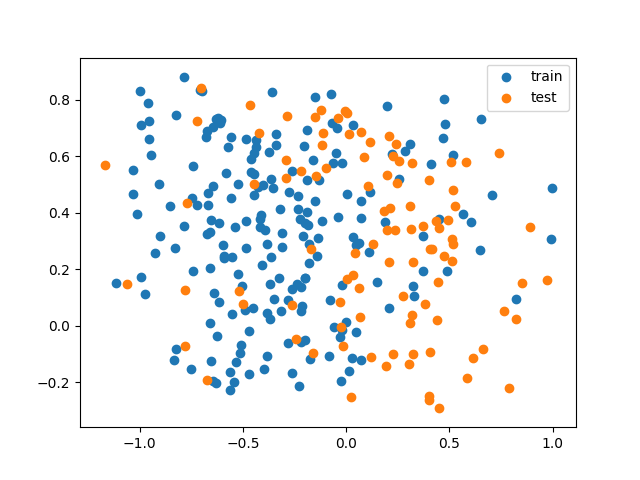

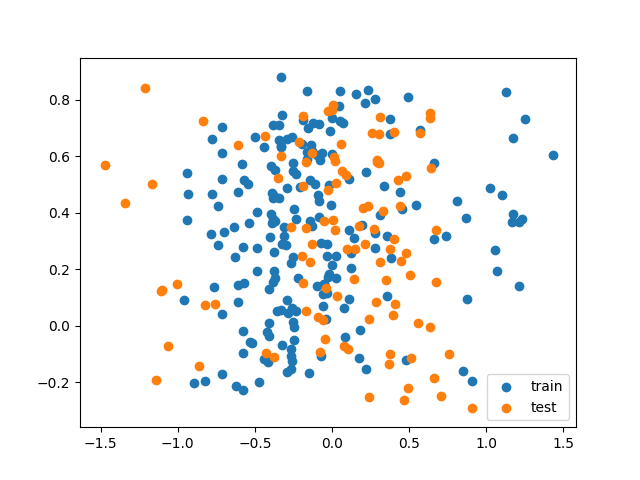

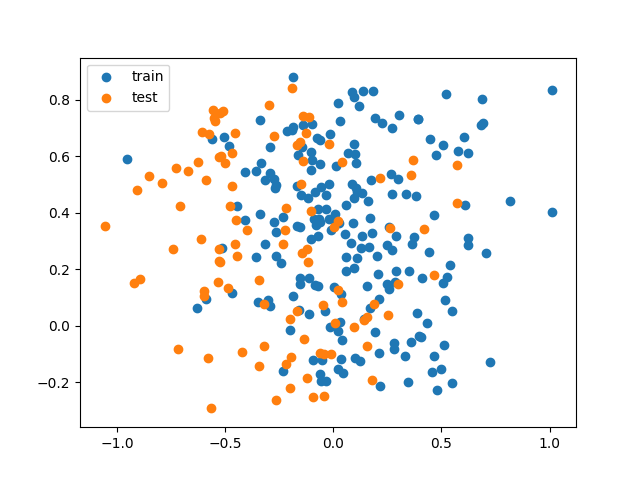

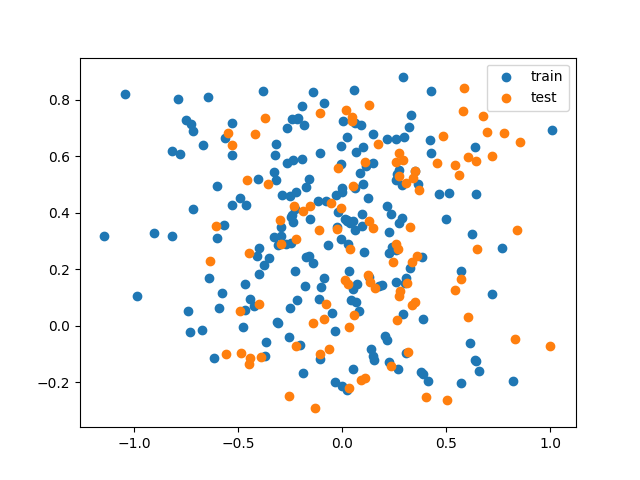

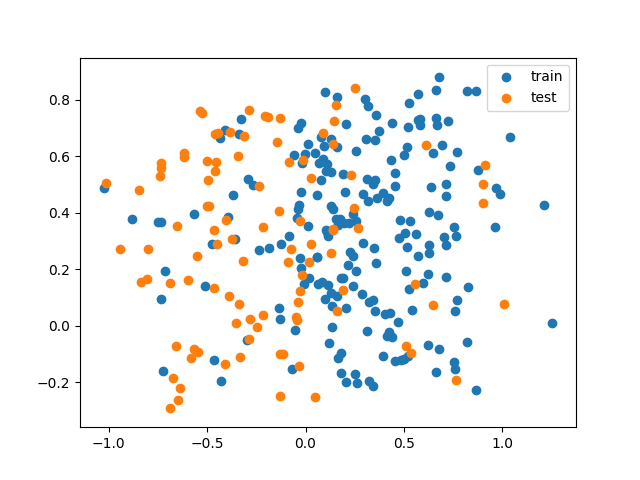

In [9]:
# plot against some random projections
num_random = 5
for i in xrange(num_random):
    random_b = np.random.normal(size=(xs_train.shape[1],1))
    random_b = random_b / np.linalg.norm(random_b)
    fig, ax = plt.subplots()
    ax.scatter(np.dot(xs_train, random_b), ys_train, label='train')
    ax.scatter(np.dot(xs_test, random_b), ys_test, label='test')
    ax.legend()
    basic.display_fig_inline(fig)